# web scraper  that will scrape Wikipedia page.

- The scraper will go to a Wikipedia page, scrape the title, and follow a random link to the next Wikipedia page.


# Setting Up the Scraper

- To make the HTTP request, I'm going to use the `requests`

In [14]:
# Import required libraries
import requests

In [15]:
# get the page u want to scrape
response = requests.get(url = "https://en.wikipedia.org/wiki/Web_scraping")

In [16]:
#status_code used to check weather the page is downloaded or not
response.status_code

200

In [17]:
# parse the page using bs4 and find the required data by inspecting 
page_contents = BeautifulSoup(response.content, 'html.parser')


# Extracting the data from the page

- Now extract the title from the HTML page, Using BeautifulSoup

In [20]:
from bs4 import BeautifulSoup


### When inspecting the Wikipedia page I see that the title tag has the #firstHeading ID.

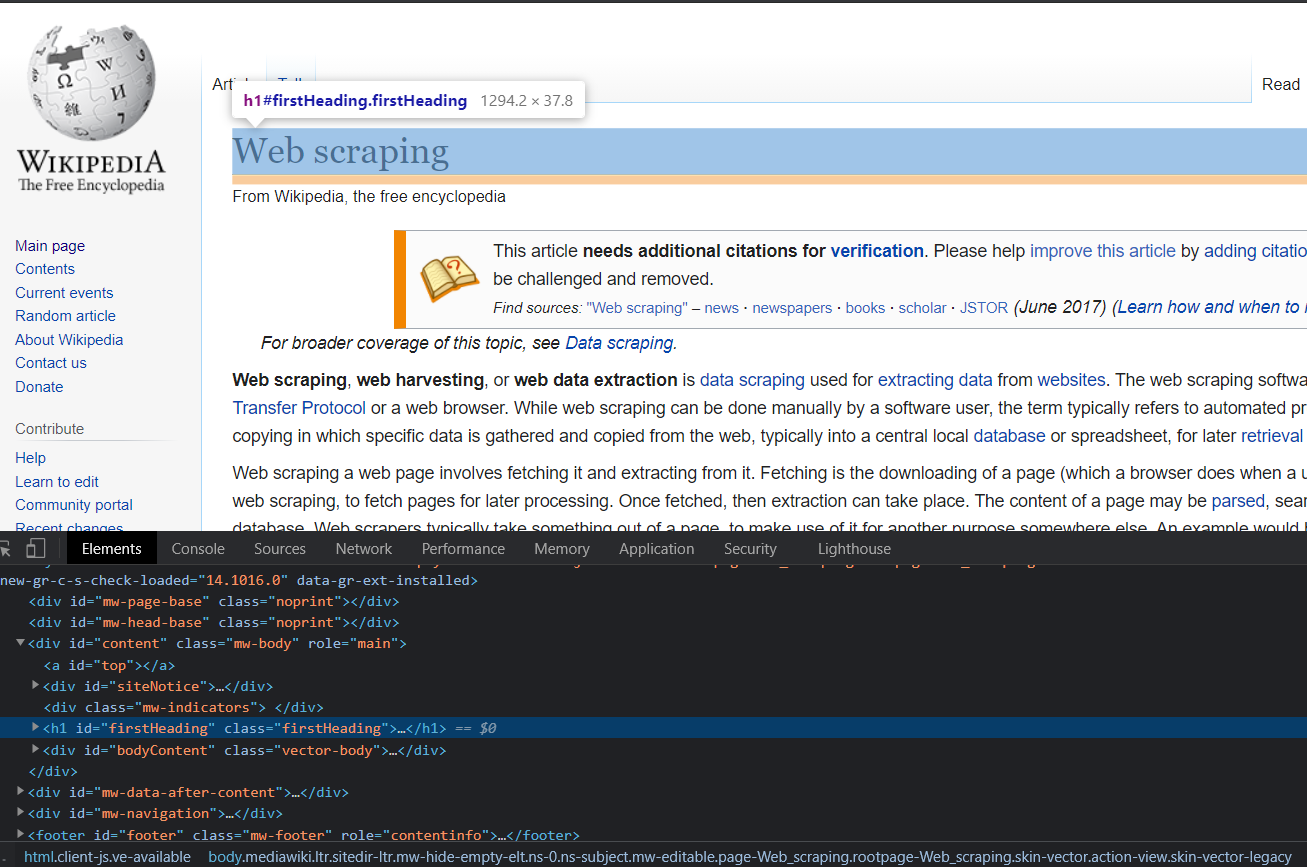

In [21]:
title = page_contents.find(id = 'firstHeading')

In [22]:
print(title.text)

Web scraping


# Scrapping Other Links

- Now I'm going into Wikipedia, and find the tag which has links for another wikipedia page

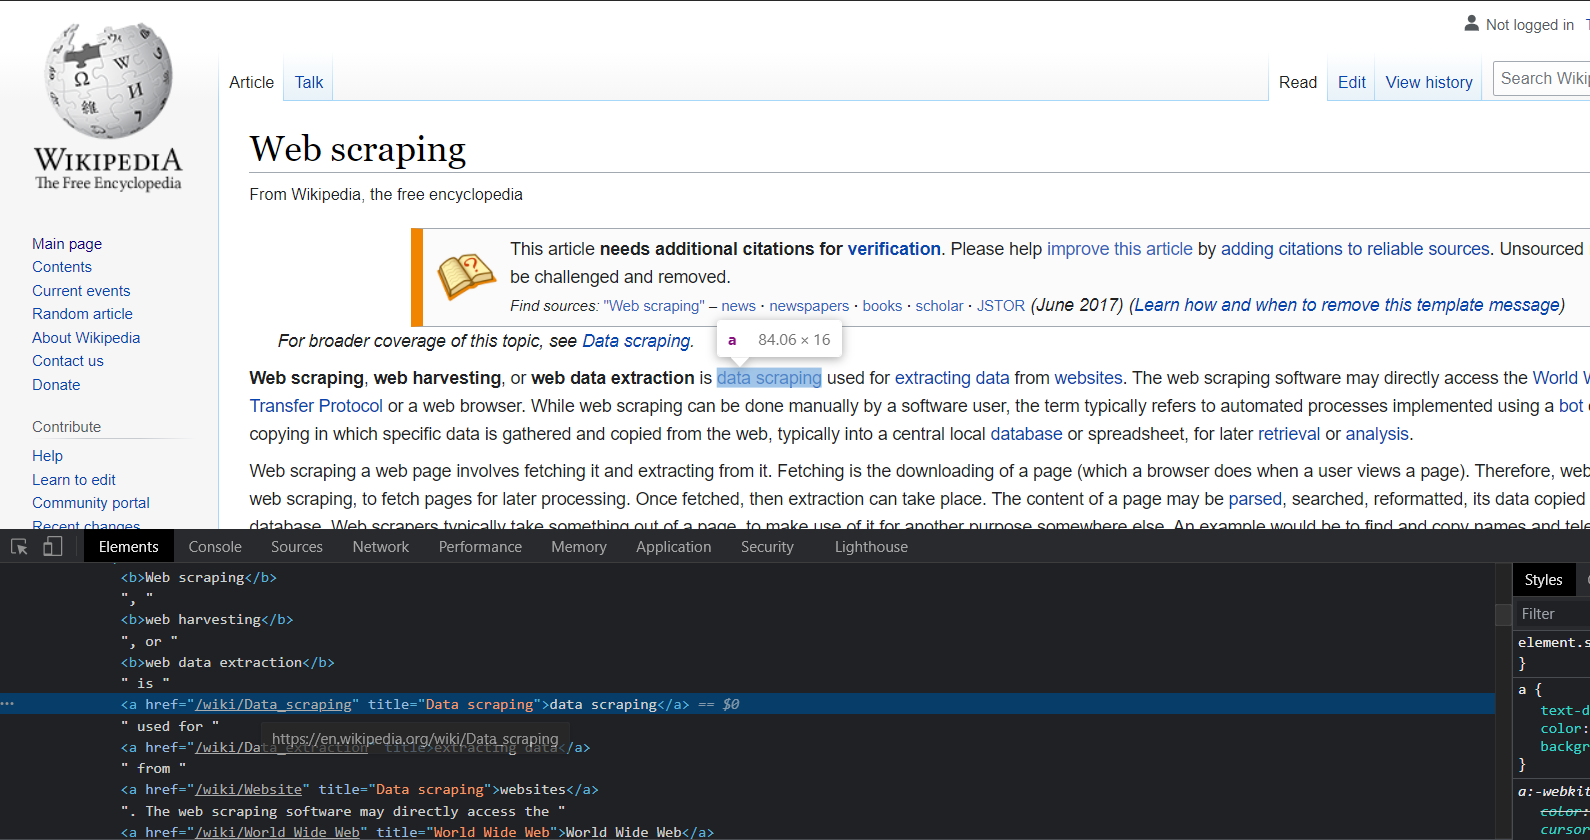


- Here I found that all the wiki links are in 'a' tags and in under 'bodyContent'
- Using BeautifulSoup we can find all the 'a' tags
- using `random` to get the link one by one

In [39]:
import random

In [41]:
# get all the links
all_links = page_contents.find(id = 'bodyContent').find_all('a')
random.shuffle(all_links)
linktoscrape = 0

- Since I'm only interested in links to other wikipedia articles, I make sure the link contains the /wiki prefix.

In [42]:
for link in all_links:
    # we are only intrested in other wiki articles
    if link['href'].find("/wiki/") == -1:
        continue
        
    # Use this link to scrape
    linktoscrape = link
    break

print(linktoscrape)


<a href="/wiki/Wikipedia:Verifiability#Burden_of_evidence" title="Wikipedia:Verifiability">removed</a>


# Creating an Endless Scraper 

- The ScrapeWikiArticle function will get the wiki article, extract the title, and find a random link.

- Then, it will call the ScrapeWikiArticle again with this new link. Thus, it creates an endless cycle of a Scraper that bounces around on wikipedia.

In [53]:
import requests
from bs4 import BeautifulSoup
import random


def ScrapeWikiArticle(url):
    response = requests.get(url=url,)
    
    soup = BeautifulSoup(response.content, 'html.parser')

    title = soup.find(id="firstHeading")
    print(title.text)

    allLinks = soup.find(id="bodyContent").find_all("a")
    random.shuffle(allLinks)
    linkToScrape = 0

    for link in allLinks:
        # We are only interested in other wiki articles
        if link['href'].find("/wiki/") == -1: 
            continue

        # Use this link to scrape
        linkToScrape = link
        break
        
    ScrapeWikiArticle("https://en.wikipedia.org" + linkToScrape['href'])
    
ScrapeWikiArticle("https://en.wikipedia.org/wiki/Web_scraping")

Web scraping
Defendant
Legal fiction
List of Stewards of the Chiltern Hundreds
Profumo affair
HM Prison Holloway
Sarah Reed (prisoner)
HM Prison Holloway
The Guardian
BT Group
Digital television
History of the telephone
Thomas Edison
Edison Records
Consolidated Edison
Entergy
New Orleans
Hispanic and Latino Americans
Kat DeLuna
Bum Bum
Glossary of music terminology
Binary form
Dominant (music)
International Standard Book Number
ISO 3307
ISO 22395
ISO 3864
Category:All stub articles


ConnectionError: HTTPSConnectionPool(host='en.wikipedia.orghttps', port=443): Max retries exceeded with url: //en.wikipedia.org/wiki/Category:All_stub_articles?from=Fe (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x00000289A48CE3C8>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))